# Анализ ключевых показателей успеваемости студентов.

## Цель исследования.

Проанализировать характеристики, влияющие на успеваемость студентов, используя библиотеку pandas.

## Задачи исследования.

В приложенных файлах содержатся данные по прохождению студентами тестов на образовательной платформе. Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента. Задачами текущего этапа исследовательского анализа является сбор и подготовка данных.

## Загрузим библиотеки

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Загрузим таблицы

### Таблица Lectures

Таблица lectures cодержит 4 столбца:

**lecture_id** тип int, содержит целые числа. Внешний ключ, уникальный идентификатор лекции.

**tag** тип int, содержит целые числа. Объединяют лекции по кластерам. Пояснение тегов не дано.

**part** тип int, содержит целые числа. Объединение по категориям лекций.

**type_of** тип object, содержит текстовые значения. Содержит информацию о целях лекции, которые делятся на 4 типа: starter ( вводная лекция), intention (лекция посвященная целям), concept ( концептуальные лекции, теория), solving question ( решение вопросов).

In [179]:
lectures = pd.read_csv (r'C:\Users\Admin\Desktop\lectures.csv', sep = ',')

In [180]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [181]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


В таблице 418 строк, пропусков не обнаружено.

In [182]:
#проверим и удалим явные дубликаты
lectures = lectures.drop_duplicates()

In [183]:
print('Существуют', lectures['lecture_id'].nunique(), 'идентификаторов лекций.')

Существуют 418 идентификаторов лекций.


In [184]:
print('Существуют', lectures['tag'].nunique(), 'тегов лекций.')

Существуют 151 тегов лекций.


In [185]:
print('Существуют', lectures['type_of'].nunique(), 'типа лекций.')

Существуют 4 типа лекций.


In [186]:
print('Существуют', lectures['part'].nunique(), 'категорий лекций.')

Существуют 7 категорий лекций.


In [187]:
#Посмотрим распределение лекций по типам в процентном соотношении:

type_of = lectures['type_of'].value_counts(normalize = True).round(2)
type_of

concept             0.53
solving question    0.44
intention           0.02
starter             0.01
Name: type_of, dtype: float64

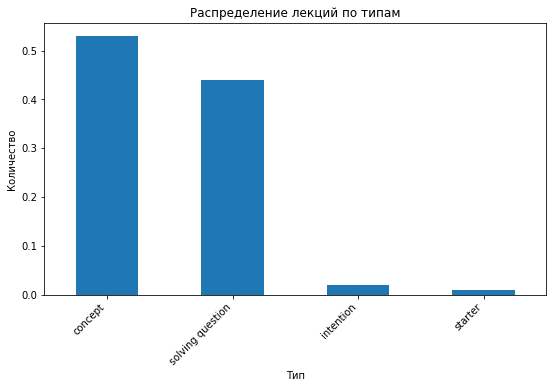

In [188]:
type_of.plot(kind='bar',figsize=(9,5), title = 'Распределение лекций по типам')
plt.xticks(rotation=45,horizontalalignment='right')
plt.ylabel('Количество')
plt.xlabel('Тип')
plt.show()

Типы лекций деляться на 4 типа:
- starter ( вводная лекция) 1%

- intention (лекция посвященная целям) 2%

- solving question ( решение вопросов) 44%

- concept ( концептуальные лекции, теория) 53%


In [189]:
part = lectures['part'].value_counts(normalize = True, ascending = False).round(2)
part

5    0.34
6    0.20
2    0.13
1    0.13
7    0.08
4    0.07
3    0.05
Name: part, dtype: float64

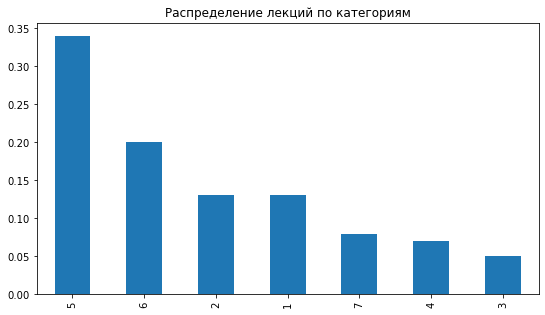

In [190]:
part.plot(kind='bar',figsize=(9,5), title = 'Распределение лекций по категориям')
plt.show()

In [191]:
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,True,NaN,True
1,56943,115,5716,0,2,2,True,37000.0,False
2,118363,115,128,0,0,0,True,55000.0,False
3,131167,115,7860,0,3,0,True,19000.0,False
4,137965,115,7922,0,4,1,True,11000.0,False


### Таблица Questions

In [192]:
questions = pd.read_csv (r'C:\Users\Admin\Desktop\questions.csv', sep = ',')

In [193]:
questions.head(5)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [194]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [195]:
#проверим и удалим явные дубликаты
questions = questions.drop_duplicates()

In [196]:
#удалим пропущенные значения
questions = questions.dropna()

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом теге в отдельном столбце.

In [197]:
#преобразуем колонку с тегами
questions['tags'] = questions['tags'].str.split(' ')

In [198]:
# создадим список уникальных тегов

all_tags = list(questions['tags'])

s = []
for tags in all_tags:
    for i in tags:
        s.append(i)

In [199]:
s = set(s)

Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного тега в столбце tags для текущей строки и возвращать 1, если тег есть в рецепте, и 0, если он отсутствует.

In [200]:
#функция для заполнения значений тегов

def contains(tag_list): 
    if tag_name in tag_list: # Если тег есть в текущей строке,
        return 1 # возвращаем значение 1
    else: 
        return 0 # возвращаем значение 0

In [201]:
for tag_name in s: # Последовательно перебираем ингредиенты в реестре all_ingredients
    questions[tag_name] = questions['tags'].apply(contains) # В DataFrame cоздаем столбец с именем текущего ингредиента и заполняем его единицами и нулями, используя ранее созданную функцию contains

questions['tags'] = questions['tags'].apply(len) # Заменяем список тегов в рецепте на их количество

In [202]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags,58,168,63,84,149,...,94,30,158,140,16,120,170,179,18,77
0,0,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,1,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,4,3,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
part_q = questions['part'].value_counts(normalize = True)
part_q 

5    0.407558
2    0.121802
3    0.115515
4    0.106419
6    0.089558
7    0.085786
1    0.073362
Name: part, dtype: float64

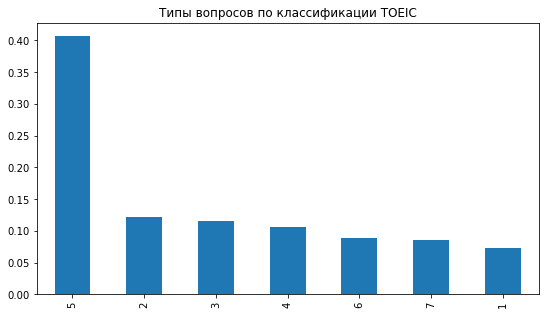

In [204]:
part_q.plot(kind='bar',figsize=(9,5))
plt.title('Типы вопросов по классификации TOEIC')
plt.show()

- **question_id**: Идентификатор вопроса, внешний ключ, дублирует индексы


- **bundle_id**: Дублирует идентификатор вопроса и индексы.


- **correct_answer** : Ответ на вопрос. Проверяет ответил ли студент правильно в таблице train.


- **part**: Группы вопросов аналогичные тесту TOEIC.


- **tags**: Теги для кластеризации вопросов.

Чтобы работать с тэгами применим изученную функцию.

### Таблица Train

In [205]:
train = pd.read_csv (r'C:\Users\Admin\Desktop\train.csv', sep = ',', nrows=500000)

#у меня ограничена память, поэтому для работы я оставила 500 000 строк

In [206]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   timestamp                       500000 non-null  int64  
 2   user_id                         500000 non-null  int64  
 3   content_id                      500000 non-null  int64  
 4   content_type_id                 500000 non-null  int64  
 5   task_container_id               500000 non-null  int64  
 6   user_answer                     500000 non-null  int64  
 7   answered_correctly              500000 non-null  int64  
 8   prior_question_elapsed_time     488373 non-null  float64
 9   prior_question_had_explanation  498254 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 38.1+ MB


In [208]:
print ('В колонке user_id:', train['user_id'].nunique(), 'уникальных пользователей')

В колонке user_id: 1749 уникальных пользователей


In [209]:
print ('В колонке content_id:', train['content_id'].nunique(), 'значений')

В колонке content_id: 13120 значений


Столбец **prior_question_had_explanation** преобразуем в булев тип.
Столбец **answered_correctly** тоже должен содержать булевы значения, строка содержит значения (-1), что вероятно ошибочно. Представим что мы уже обратились за уточнением к источнику данных, который подтвердил нашу гипотезу.

In [210]:
# Заменим тип данных
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype(bool)
train['answered_correctly'] = train['answered_correctly'].astype(bool)

In [211]:
train ['user_answer'].value_counts()

 0    138223
 1    133683
 3    129029
 2     89184
-1      9881
Name: user_answer, dtype: int64

In [212]:
train['user_answer'] = train['user_answer'].abs()

Колонка **user_answer** cодержит значение -1, поступим аналогично, исходя из того, что нам подтвердил источник что -1 это 1.

In [213]:
# Удалим колонку row_id как дублирующую индексы строк
train = train.drop('row_id', axis=1)

In [214]:
train['content_type_id'].value_counts(normalize = True).round(2)

0    0.98
1    0.02
Name: content_type_id, dtype: float64

Только 2% значений столбца тип контента содержит значение 1. 

Дадим описание колонкам.

- **timestamp**


- **user_id** Идентификатор пользователя.


- **content_id** Идентификатор пользовательского взаимодействия.


- **content_type_id** Тип пользовательского взаимодействия. Вопрос для пользователя - 0. Просмотр пользователем лекции - 1


- **task_container_id** Идентификатор для серии вопросов или серии лекций.


- **user_answer** Ответы пользователей.


- **answered_correctly** Правильные ответы.


- **prior_question_elapsed_time**  Среднее время в милисекундах, которое потребовалось пользователю, чтоб ответить на каждый вопрос в предыдущем наборе вопросов.  Равно нулю для первого пакета вопросов.


- **prior_question_had_explanation**

In [215]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,500000.0,7.240829e+09,1.067811e+10,0.0,5.322578e+08,2.926425e+09,9.534202e+09,7.809200e+10
user_id,500000.0,4.929594e+06,2.778324e+06,115.0,2.641711e+06,4.702585e+06,7.171715e+06,9.678259e+06
content_id,500000.0,5.285476e+03,3.906227e+03,0.0,2.063000e+03,5.160000e+03,7.641000e+03,3.273600e+04
content_type_id,500000.0,1.976200e-02,1.391815e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
task_container_id,500000.0,8.916981e+02,1.121464e+03,0.0,1.220000e+02,4.360000e+02,1.256000e+03,7.739000e+03
user_answer,500000.0,1.418038e+00,1.145554e+00,0.0,0.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00
prior_question_elapsed_time,488373.0,2.486088e+04,1.917049e+04,0.0,1.566700e+04,2.100000e+04,2.900000e+04,3.000000e+05


In [216]:
#удалим дубликаты
train = train.drop_duplicates()

In [217]:
train.shape

(499999, 9)

In [218]:
correctly = train.groupby(by = 'answered_correctly').mean().T
correctly

answered_correctly,False,True
timestamp,6.459811e+09,7.637603e+09
user_id,5.061140e+06,4.862766e+06
content_id,5.150123e+03,5.354247e+03
content_type_id,0.000000e+00,2.980217e-02
task_container_id,8.642894e+02,9.056162e+02
user_answer,1.421114e+00,1.416473e+00
prior_question_elapsed_time,2.449823e+04,2.505093e+04
prior_question_had_explanation,8.812142e-01,9.094172e-01


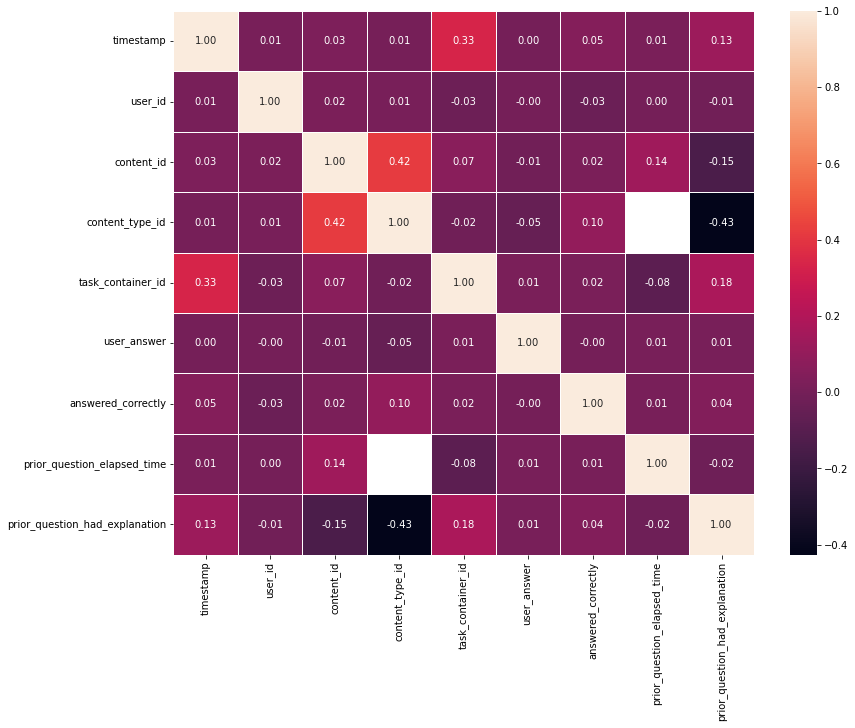

In [219]:
corr = train.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr,  annot = True, fmt = '0.2f', linewidths= 1,  )
plt.show()

Мы не нашли значимых корреляций между столбцами.

Посмотрим количество верных и неверных ответов.

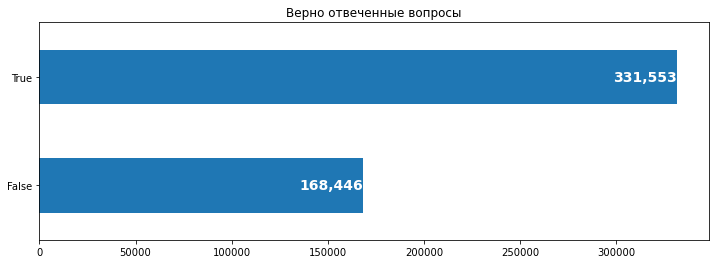

In [220]:
correct = train[train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title('Верно отвеченные вопросы')
plt.xticks(rotation=0)
plt.show()